In [1]:
import serial
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def readArduinoData():
    data = []
    PORT = 0
    while True:
        try:
            RGBcircuit = serial.Serial("COM"+str(PORT), baudrate=9600, timeout=1)
            break
        except:
            PORT = PORT + 1

    print("PORT Connected to COM" + str(PORT))

    for index in range(1000):
        try:
            tempData = list(map(int ,RGBcircuit.readline().decode()[:-1].split(", ")))
            data.append(tempData)
        
            if index % 100 == 0:
                print("Progress -> {} %".format(index / 10))

        except UnicodeDecodeError:
            pass

        except KeyboardInterrupt:
            exit()

        except ValueError:
            exit()

    RGBcircuit.close()
    data = np.array(data, dtype="int16")
    average = np.mean(data, axis=1)
   
    return data, average

<h2> Regression Equations for R, G, B </h2>

$$R = 40.5785 \sqrt{I_{R} - 42.1185} - 239.378$$

$$G = 0.02052 (I_{G} + 347.788)^{1.5} - 43.2058$$

$$B = 0.02475 (I_{B} + 460.702)^{1.5} - 326.867$$



<h2> Inverse Equations for finding Intensity of each </h2>

$$I_{R} = (\frac{R + 239.378}{40.5785}) ^ {2} + 42.1185$$
<br>
$$I_{G} = (\frac{G + 43.2058}{0.02052}) ^ {\frac{2}{3}} - 347.788 $$
<br>
$$I_{B} = (\frac{B + 326.867}{0.02475}) ^ {\frac{2}{3}} - 460.702 $$

In [3]:
def InverteReadings(data):
    IR = np.power((data[:, 0] + 239.378) / 40.5785, 2) + 42.1185
    IG = np.power((data[:, 1] + 43.2058) / 0.02052, 2/3) - 367.788
    IB = np.power((data[:, 2] + 326.867) / 0.02475, 2/3) - 460.702

    return IR, IG, IB

In [4]:
data, average = readArduinoData()

PORT Connected to COM6
Progress -> 10.0 %
Progress -> 20.0 %
Progress -> 30.0 %
Progress -> 40.0 %
Progress -> 50.0 %
Progress -> 60.0 %
Progress -> 70.0 %
Progress -> 80.0 %
Progress -> 90.0 %


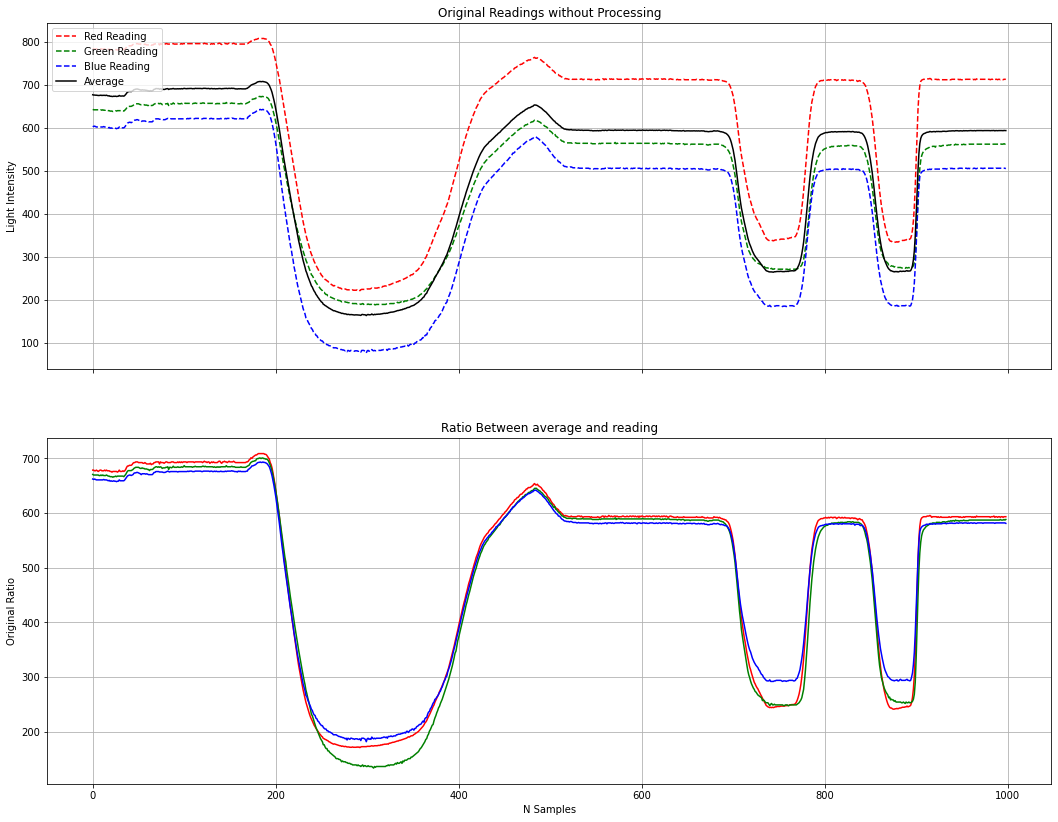

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (18, 14))

t = np.arange(0, data[:, 0].shape[0], 1)

ax[0].set_title("Original Readings without Processing")
ax[0].set_ylabel("Light Intensity")
ax[0].plot(t, data[:, 0], 'r--', label="Red Reading")
ax[0].plot(t, data[:, 1], 'g--', label="Green Reading")
ax[0].plot(t, data[:, 2], 'b--', label="Blue Reading")
ax[0].plot(t, average, 'k', label="Average")
ax[0].grid()
ax[0].legend(loc = 'upper left')

R, G, B = InverteReadings(data)

ax[1].set_xlabel("N Samples")
ax[1].set_title("Ratio Between average and reading")
ax[1].set_ylabel("Original Ratio")
ax[1].plot(t, R, 'r')
ax[1].plot(t, G, 'g')
ax[1].plot(t, B, 'b')
ax[1].grid()

plt.show()